<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Knowledge-Tester-2" data-toc-modified-id="Knowledge-Tester-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Knowledge Tester 2</a></span></li></ul></div>

# Knowledge Tester 2
<img src="Figures/Particle_sliding_on_Double_Pendulum.png" height=300 width=300>

This notebook uses the example of a particle $P$ sliding on a double pendulum (see figure above); this system was first presented to you in the file "7 Particle Kinematics". Your objective is to compute:
1. $^N{\bf a}^P$, acceleration of $P$ in $N$. __You should save the final answer in a variable named `N_a_P_vector`__ ; and
2. $^A{\bf a}^P$, acceleration of $P$ in $A$.  __You should save the final answer in a variable named `A_a_P_vector`__.

__You are to complete this task using the appropriate velocity/acceleration transfer theorems for accelerations and express all your answers in the unit vectors attached to the $A$ frame.__

Other suggestions for variable names that will help you in your computation of the accelerations are:
1.  `l_scalar` that represents $l$, the length of the links $A$ and $B$; 
2. `theta_1_scalar` to represent  $\theta_1$;
3. `theta_2_scalar` to represent $\theta_2$; and
4. `x_scalar` to represent $x$; and
5. `N` to represent the reference frame $N$; and
6. `A` to represent the reference frame $A$; and
7. `B` to represent the reference frame $B$; and
8. `O` to represent the point $O$; and
9. `Q` to represent the point $Q$; and
10. `P` to represent the point $P$.

Note that you have to choose which of the variables are time-varying. Please enter all of your work in the code cell below.

<img src="Figures/KT2_Solution_Handwritten.png" height=450 width=450>

In [1]:
from sympy import symbols, sin, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, init_vprinting, Point
init_vprinting()

# Create symbols
l_scalar = symbols('l')
theta_1_scalar, theta_2_scalar, x_scalar = dynamicsymbols('theta_1, theta_2, x')
x_scalar_dot = dynamicsymbols('x', 1)

# Create Reference Frames
N = ReferenceFrame('N')
A = ReferenceFrame('A')
B = ReferenceFrame('B')
A.orient(N, 'Axis', (theta_1_scalar, N.z))
B.orient(A, 'Axis', (theta_2_scalar, A.z))

# Angular velocities
N_w_A_vector = A.ang_vel_in(N)
N_w_B_vector = B.ang_vel_in(N)
A_w_B_vector = B.ang_vel_in(A)

# Angular accelerations
N_alpha_A_vector = A.ang_acc_in(N)
N_alpha_B_vector = B.ang_acc_in(N)
A_alpha_B_vector = B.ang_acc_in(A)

In [2]:
# Create Points
O = Point('O')
Q = Point('Q')
P = Point('P')

# Define positions of points relative to each other
Q.set_pos(O, l_scalar*A.y)
P.set_pos(Q, x_scalar*B.y)

# Define positions of points relative to each other
r_OQ_vector = Q.pos_from(O)
r_QP_vector = P.pos_from(Q)
r_OP_vector = r_OQ_vector + r_QP_vector

In [3]:
# Set and store some of the known velocities
O.set_vel(N, 0)
O.set_vel(A, 0)
N_v_O_vector = O.vel(N)
N_a_O_vector = O.acc(N)

Q.set_vel(A, 0)
Q.set_vel(B, 0)

P.set_vel(B, x_scalar_dot*B.y)
B_v_P_vector = P.vel(B)
B_a_P_vector = P.acc(B)

In [4]:
N_a_Q_vector = N_a_O_vector + N_alpha_A_vector.cross(r_OQ_vector) + N_w_A_vector.cross(N_w_A_vector.cross(r_OQ_vector))

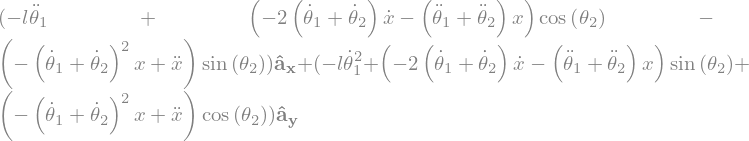

In [5]:
N_a_P_vector = B_a_P_vector + N_a_Q_vector + N_alpha_B_vector.cross(r_QP_vector) + N_w_B_vector.cross(N_w_B_vector.cross(r_QP_vector)) + 2 * N_w_B_vector.cross(B_v_P_vector)
N_a_P_vector.express(A)

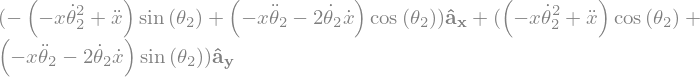

In [6]:
A_a_Q_vector = Q.acc(A)
A_a_P_vector = B_a_P_vector + A_a_Q_vector + A_alpha_B_vector.cross(r_QP_vector) + A_w_B_vector.cross(A_w_B_vector.cross(r_QP_vector)) + 2 * A_w_B_vector.cross(B_v_P_vector)
A_a_P_vector.express(A)